In [1]:
import pandas as pd
import numpy as np
import json
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# load dataset
df = pd.read_parquet("hf://datasets/dream-textures/textures-color-normal-1k/data/train-00000-of-00001-7d3033d434a1d73a.parquet")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [29]:
# print dataset
print(df)

                                                  color  \
0     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
1     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
2     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
3     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
4     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
...                                                 ...   
1421  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
1422  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
1423  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
1424  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   
1425  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...   

                                                 normal  
0     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  
1     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  
2     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  
3     {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  
4

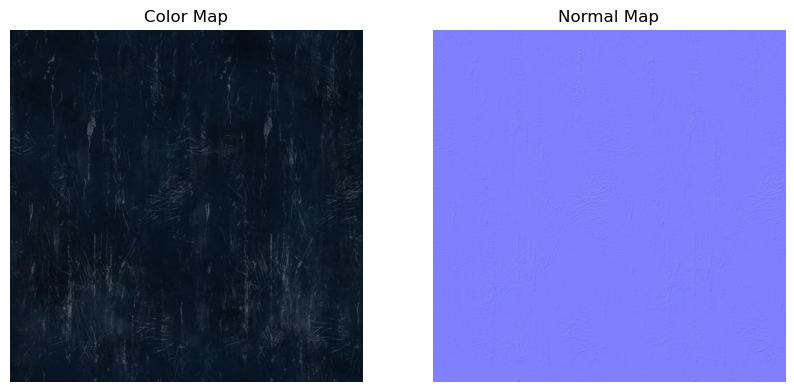

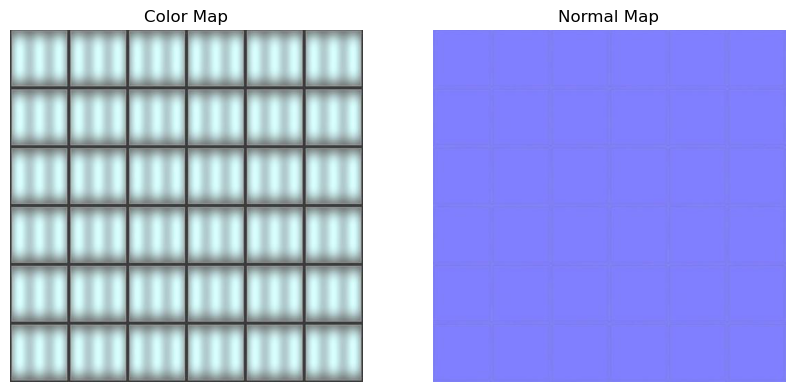

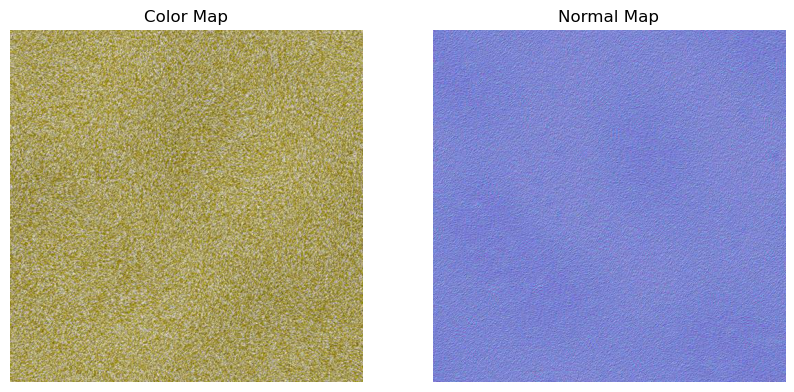

In [30]:
# function to show image
def show_image(image_bytes, title):
    image = Image.open(BytesIO(image_bytes))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

# sample of images
for i in range(3):
    sample = df.iloc[i]
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    show_image(sample['color']['bytes'], 'Color Map')

    plt.subplot(1, 2, 2)
    show_image(sample['normal']['bytes'], 'Normal Map')

    plt.savefig(f'textures_sample_hf_{i}.png')
    plt.show()

In [26]:
# function to calculate average pixel value by channel
def average_pixel(image_bytes):
    image = Image.open(BytesIO(image_bytes)).convert('RGB')
    np_image = np.array(image)
    return np.mean(np_image, axis=(0, 1))

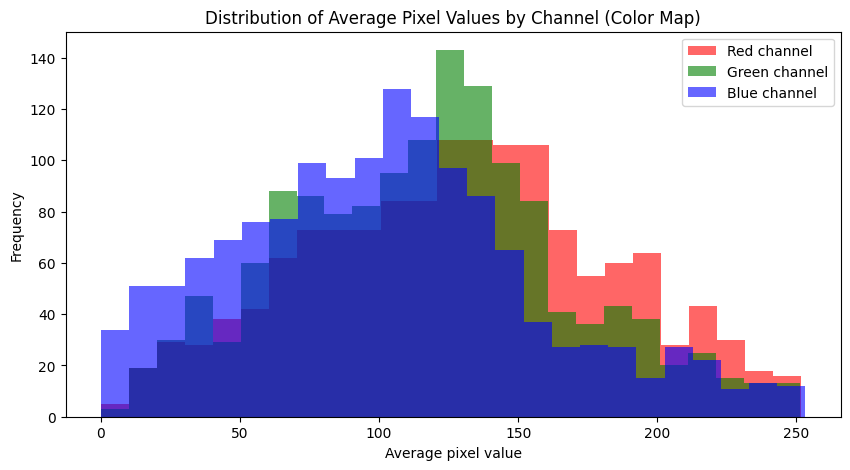

In [9]:
# compute average pixel value for dataset
average_colors = [average_pixel(df.iloc[i]['color']['bytes']) for i in range(len(df)) if i != 465]
# index 465 has information about file_name and text description

# convert to numpy array for analysis
average_colors = np.array(average_colors)

# plot average pixel distribution
plt.figure(figsize=(10, 5))
plt.hist(average_colors[:, 0], bins=25, color='red', alpha=0.6, label='Red channel')
plt.hist(average_colors[:, 1], bins=25, color='green', alpha=0.6, label='Green channel')
plt.hist(average_colors[:, 2], bins=25, color='blue', alpha=0.6, label='Blue channel')
plt.xlabel('Average pixel value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Average Pixel Values by Channel (Color Map)')
plt.savefig('distribution_avg_pixel_color_map.png')
plt.show()

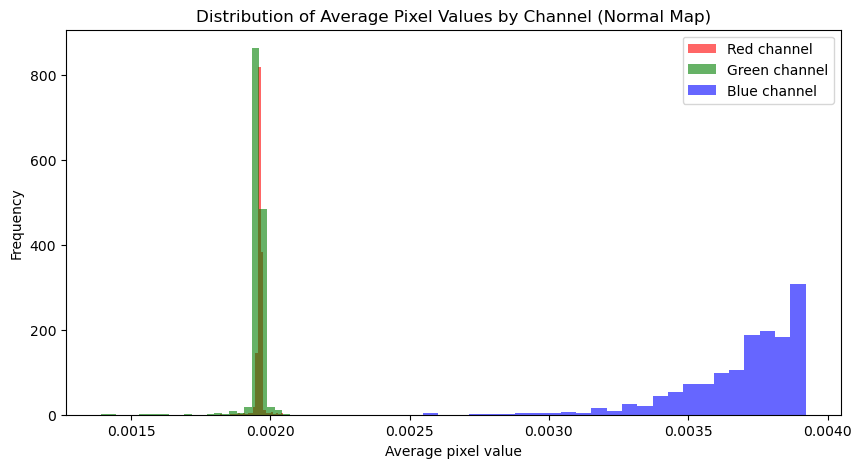

In [ ]:
# compute average pixel value for dataset
average_colors_normal = [average_pixel(df.iloc[i]['normal']['bytes']) for i in range(len(df)) if i != 465]
# index 465 has information about file_name and text description

# convert to numpy array for analysis
average_colors_normal = np.array(average_colors_normal)

# plot average pixel distribution
plt.figure(figsize=(10, 5))
plt.hist(average_colors_normal[:, 0], bins=25, color='red', alpha=0.6, label='Red channel')
plt.hist(average_colors_normal[:, 1], bins=25, color='green', alpha=0.6, label='Green channel')
plt.hist(average_colors_normal[:, 2], bins=25, color='blue', alpha=0.6, label='Blue channel')
plt.xlabel('Average pixel value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Average Pixel Values by Channel (Normal Map)')
plt.savefig('distribution_avg_pixel_normal_map.png')
plt.show()

In [25]:
# function to calculate average pixel value by channel
def normalized_average_pixel(image_bytes):
    image = Image.open(BytesIO(image_bytes)).convert('RGB')
    np_image = np.array(image)
    return np.mean(np_image, axis=(0, 1)) / 255

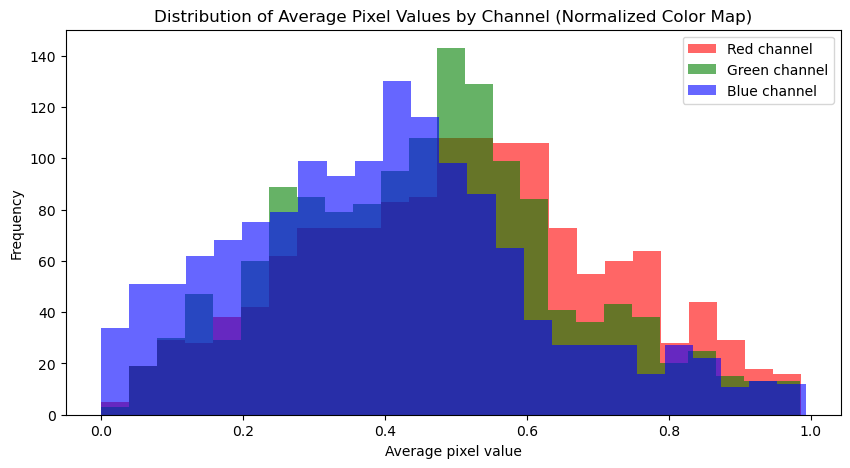

In [27]:
# compute average pixel value for dataset
average_colors = [normalized_average_pixel(df.iloc[i]['color']['bytes']) for i in range(len(df)) if i != 465]
# index 465 has information about file_name and text description

# convert to numpy array for analysis
average_colors = np.array(average_colors)

# plot average pixel distribution
plt.figure(figsize=(10, 5))
plt.hist(average_colors[:, 0], bins=25, color='red', alpha=0.6, label='Red channel')
plt.hist(average_colors[:, 1], bins=25, color='green', alpha=0.6, label='Green channel')
plt.hist(average_colors[:, 2], bins=25, color='blue', alpha=0.6, label='Blue channel')
plt.xlabel('Average pixel value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Average Pixel Values by Channel (Normalized Color Map)')
plt.savefig('distribution_avg_pixel_color_map_normalized.png')
plt.show()

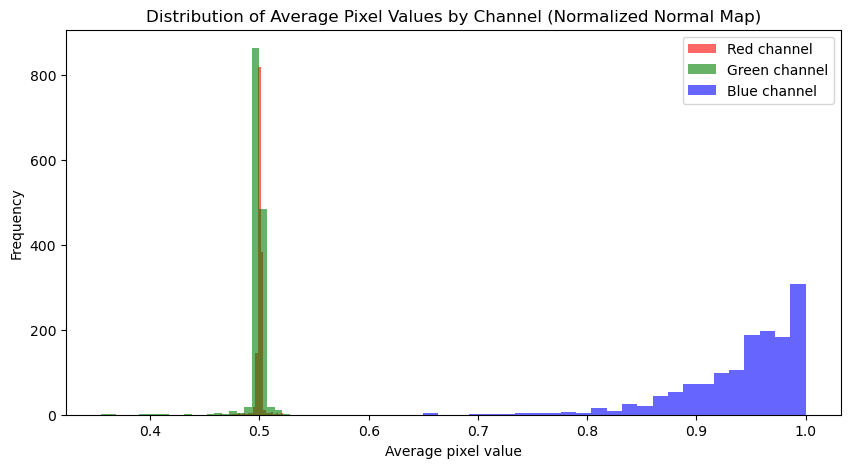

In [31]:
# compute average pixel value for dataset
average_colors_normal = [normalized_average_pixel(df.iloc[i]['normal']['bytes']) for i in range(len(df)) if i != 465]
# index 465 has information about file_name and text description

# convert to numpy array for analysis
average_colors_normal = np.array(average_colors_normal)

# plot average pixel distribution
plt.figure(figsize=(10, 5))
plt.hist(average_colors_normal[:, 0], bins=25, color='red', alpha=0.6, label='Red channel')
plt.hist(average_colors_normal[:, 1], bins=25, color='green', alpha=0.6, label='Green channel')
plt.hist(average_colors_normal[:, 2], bins=25, color='blue', alpha=0.6, label='Blue channel')
plt.xlabel('Average pixel value')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Average Pixel Values by Channel (Normalized Normal Map)')
plt.savefig('distribution_avg_pixel_normal_map_normalized.png')
plt.show()

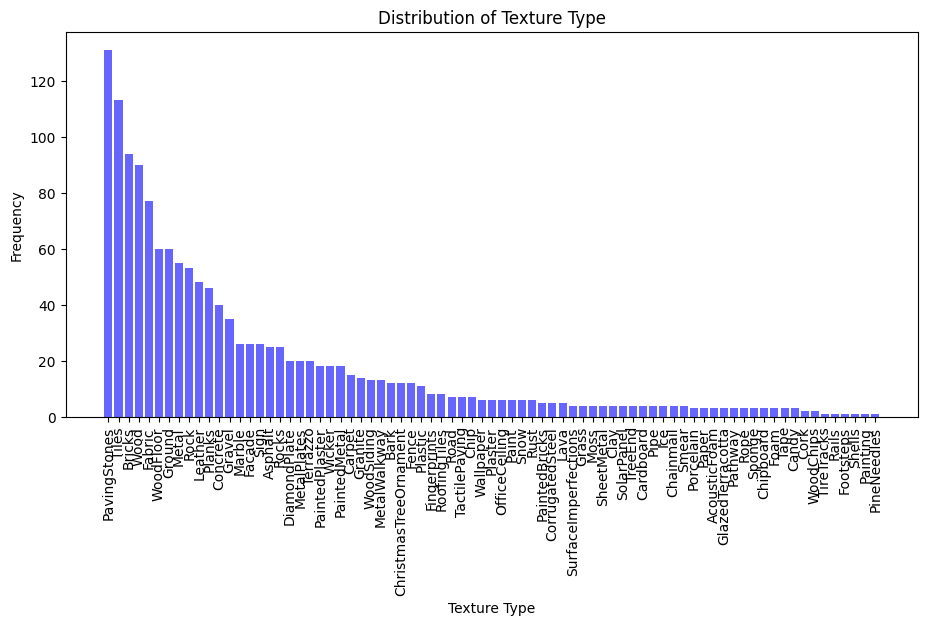

<Figure size 640x480 with 0 Axes>

In [10]:
# byte string
data_color = df.color[465]['bytes']

# bytes to string
decoded_data_color = data_color.decode("utf-8")

# split into individual JSON objects
json_objects_color = decoded_data_color.strip().split("\n")

# extract file_name values
file_names_color = [json.loads(obj)["file_name"] for obj in json_objects_color]

# function to clean text
def clean_text(filename):
    match = re.match(r"([^\d]+)", filename)
    return match.group(1) if match else filename

results_color = [clean_text(f) for f in file_names_color]

# count frequency of each texture
texture_counts_color = Counter(results_color)

# sort textures by count in descending order
sorted_texture_color = sorted(texture_counts_color.items(), key=lambda x: x[1], reverse=True)

# extract sorted categories and frequencies
categories, frequencies = zip(*sorted_texture_color)

# plot histogram
plt.figure(figsize=(11, 5))
plt.bar(categories, frequencies, color='blue', alpha=0.6)
plt.xlabel('Texture Type')
plt.ylabel('Frequency')
plt.title('Distribution of Texture Type')
plt.xticks(rotation=90)
plt.show()
plt.savefig('distribution_texture_type.png')

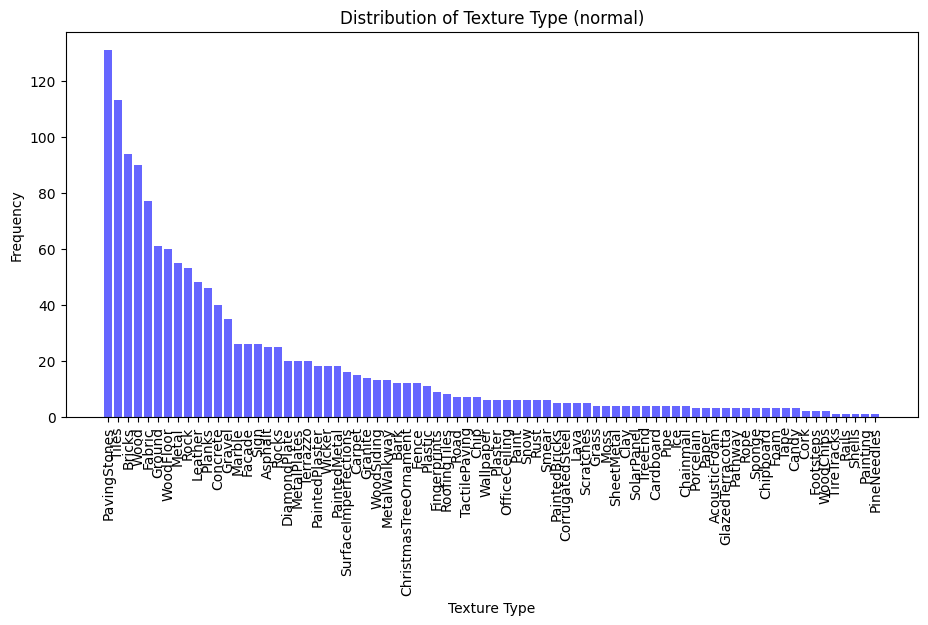

In [11]:
# byte string
data_normal = df.normal[465]['bytes']

# bytes to string
decoded_data_normal = data_normal.decode("utf-8")

# split into individual JSON objects
json_objects_normal = decoded_data_normal.strip().split("\n")

# extract file_name values
file_names_normal = [json.loads(obj)["file_name"] for obj in json_objects_normal]

results_normal = [clean_text(f) for f in file_names_normal]

# count frequency of each texture
texture_counts_normal = Counter(results_normal)

# sort textures by count in descending order
sorted_texture_normal = sorted(texture_counts_normal.items(), key=lambda x: x[1], reverse=True)

# extract sorted categories and frequencies
categories, frequencies = zip(*sorted_texture_normal)

# plot histogram
plt.figure(figsize=(11, 5))
plt.bar(categories, frequencies, color='blue', alpha=0.6)
plt.xlabel('Texture Type')
plt.ylabel('Frequency')
plt.title('Distribution of Texture Type (normal)')
plt.xticks(rotation=90)
plt.show()

# it has the same distribution as the previous one we save just one

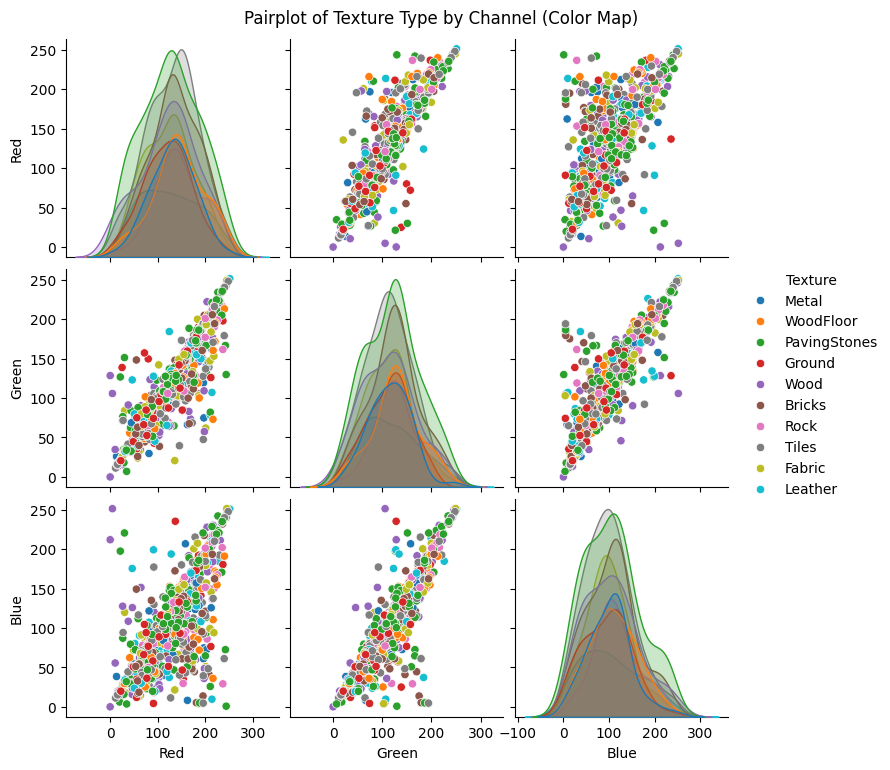

In [12]:
# see if there's any pattern with average pixel value and texture type
df_colors = pd.DataFrame(average_colors, columns=['Red', 'Green', 'Blue'])
df_colors['Texture'] = results_color  # Add texture type
top_textures = [texture for texture, _ in sorted_texture_color][:10]

# keep only top 10 textures
df_top_colors = df_colors[df_colors['Texture'].isin(top_textures)]

# pairplot
sns.pairplot(df_top_colors, hue="Texture", palette="tab10", diag_kind="kde")
plt.suptitle("Pairplot of Texture Type by Channel (Color Map)", y=1.02)
plt.savefig('pairplot_texture_color_map.png')
plt.show()

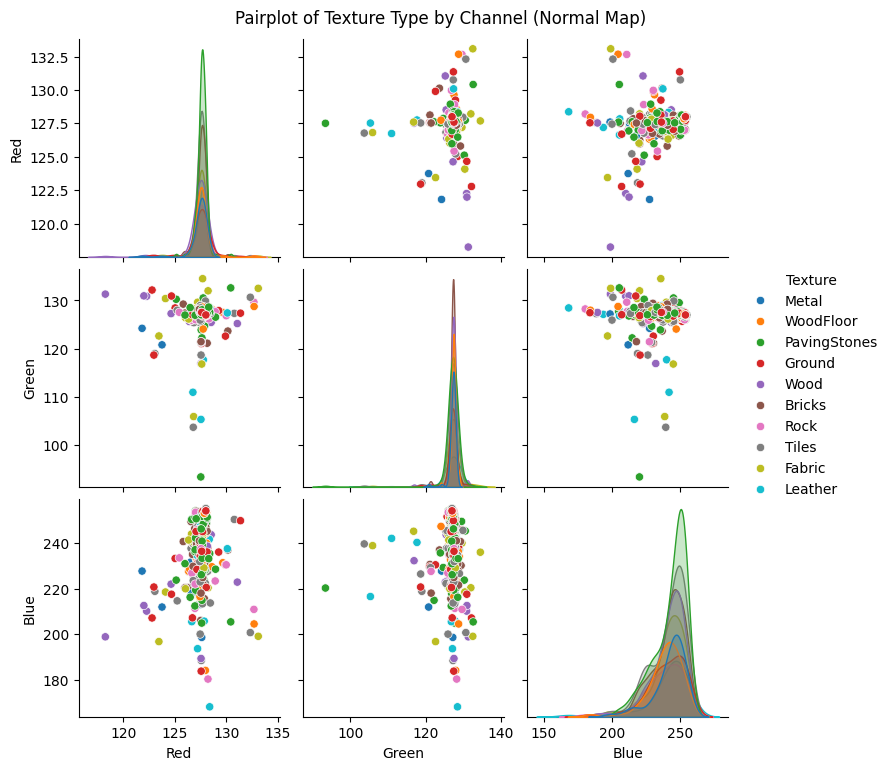

In [13]:
# see if there's any pattern with average pixel value and texture type
df_normal = pd.DataFrame(average_colors_normal, columns=['Red', 'Green', 'Blue'])
df_normal['Texture'] = results_color  # Add texture type

# keep only top 10 textures
df_top_normal = df_normal[df_normal['Texture'].isin(top_textures)]

# pairplot
sns.pairplot(df_top_normal, hue="Texture", palette="tab10", diag_kind="kde")
plt.suptitle("Pairplot of Texture Type by Channel (Normal Map)", y=1.02)
plt.savefig('pairplot_texture_normal_map.png')
plt.show()